In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [52]:
df = pd.read_csv("/python_vacancies.csv")
df

,title,url,company,description,city,requirements,experience
0,Python Developer,https://jobs.dou.ua/companies/holy-water/vacan...,HOLYWATER,ЗУСТРІЧАЙТЕ СВОЮ МАЙБУТНЮ КОМАНДУ!Ви будете пр...,"Київ, за кордоном, віддалено","Python, SQL, C, R",0-1
1,Junior Python розробник,https://jobs.dou.ua/companies/aprior-it/vacanc...,Apriorit,Apriorit — компанія з розробки програмного заб...,"Київ, Дніпро, віддалено","Python, SQL, C, R, Flask, Git, Docker, Kuberne...",0-1
2,Стажер Python Developer для УНКД,https://jobs.dou.ua/companies/nko-go-unkd/vaca...,"ГО ""УНКД""","УНКД — це унікальний проект, що живе питанням ...",віддалено,"Python, R",0-1
3,Python Developer у Стартап,https://jobs.dou.ua/companies/esupport/vacanci...,ESUPPORT,Компанія ESUPPORT спеціалізується на B2B лідог...,Unknown,"Python, C, R",0-1
4,Middle Python Database Developer,https://jobs.dou.ua/companies/nova-digital/vac...,Nova Digital,"Українська IT-компанія Nova Digital, що входит...","Київ, віддалено","Python, SQL, C, Go, R, PostgreSQL, Git, NumPy,...",1-3
...,...,...,...,...,...,...,...
132,Senior QA Automation Engineer (Computer Networ...,https://jobs.dou.ua/companies/plvision/vacanci...,PLVision,PLVision invites a Senior QA Automation Engine...,"Київ, Львів, Краків (Польща), віддалено","Python, C, Go, R, Jenkins, Ansible",5+
133,Networking Automation QA Architect,https://jobs.dou.ua/companies/plvision/vacanci...,PLVision,PLVision invites a technical leader with a dee...,"Київ, Львів, Одеса, віддалено","Python, C, Go, R, Foundation, Docker, Kubernet...",5+
134,Senior Python Engineer,https://jobs.dou.ua/companies/proxet/vacancies...,Proxet,About the role:We are looking for a highly ski...,віддалено,"Python, SQL, C, Go, Rust, R, Django, PostgreSQ...",5+
135,Senior Python Developer — AI/Chatbot Lead,https://jobs.dou.ua/companies/itexpert-recruit...,ITExpert - IT Recruitment agency,"✦Компанія спеціалізується на веб-розробці, збе...",віддалено,C,5+


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         137 non-null    object
 1   url           137 non-null    object
 2   company       137 non-null    object
 3   description   137 non-null    object
 4   city          137 non-null    object
 5   requirements  137 non-null    object
 6   experience    137 non-null    object
dtypes: object(7)
memory usage: 7.6+ KB


In [54]:
unique_companies_count = df["company"].nunique()
print(f"Number of unique companies: {unique_companies_count}")

Number of unique companies: 117


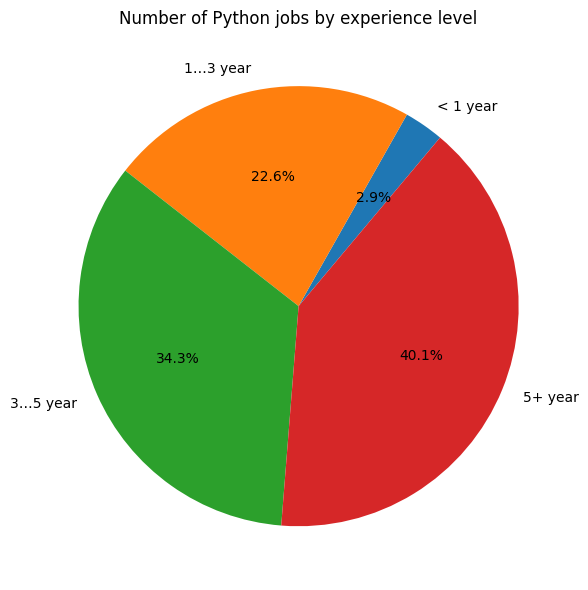

In [55]:
experience_mapping = {
    "0-1": "< 1 year",
    "1-3": "1…3 year",
    "3-5": "3…5 year",
    "5+": "5+ year"
}

df["experience_mapped"] = df["experience"].map(experience_mapping)
experience_counts = df["experience_mapped"].value_counts().reindex(["< 1 year", "1…3 year", "3…5 year", "5+ year"])

plt.figure(figsize=(6, 6))
ax = plt.gca()
ax.pie(experience_counts, labels=experience_counts.index, autopct="%1.1f%%", startangle=50)
ax.axis("equal")
plt.title("Number of Python jobs by experience level")
plt.tight_layout()
plt.show()

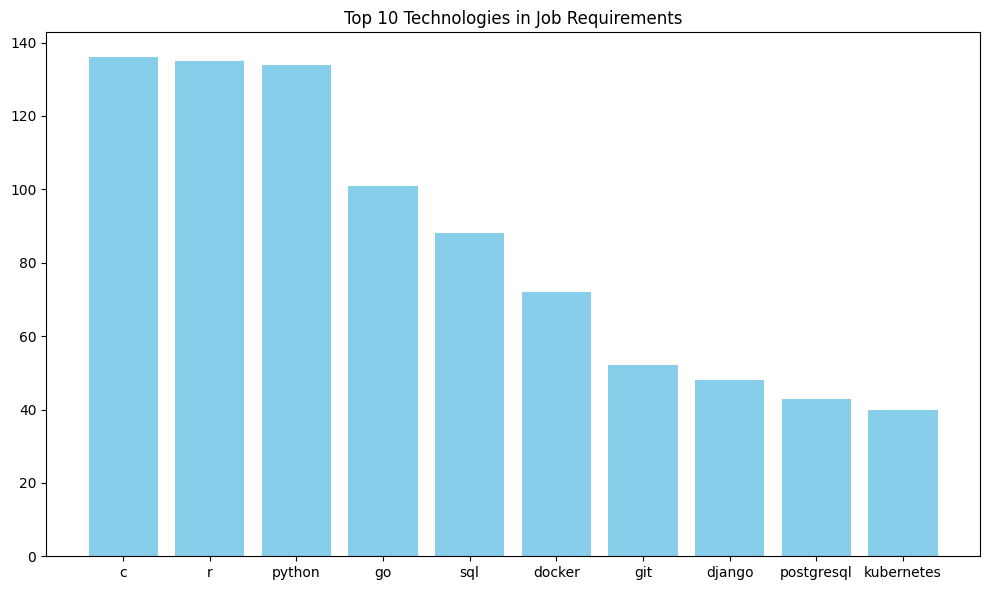

In [56]:
all_requirements = df["requirements"].str.cat(sep=",").split(",")
technology_count = Counter([tech.strip().lower() for tech in all_requirements])
top_10_technologies = technology_count.most_common(10)
technologies, counts = zip(*top_10_technologies)

plt.figure(figsize=(10, 6))
plt.bar(technologies, counts, color="skyblue")
plt.title("Top 10 Technologies in Job Requirements")

plt.tight_layout()
plt.show()

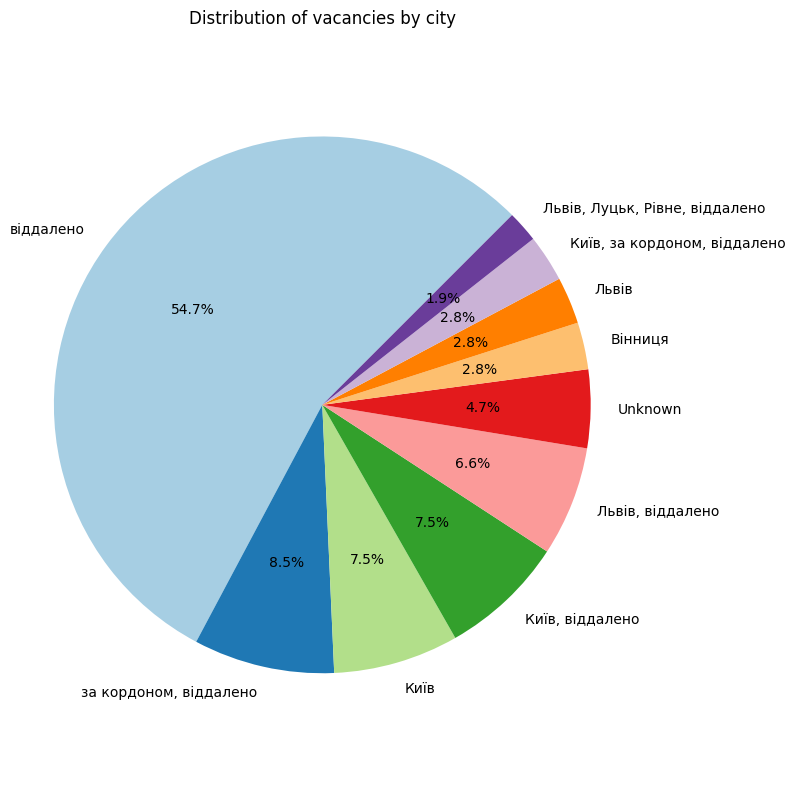

In [57]:
city_counts = df["city"].value_counts().nlargest(10)

plt.figure(figsize=(8, 8))
plt.pie(city_counts, labels=city_counts.index, autopct="%1.1f%%", startangle=45, colors=plt.cm.Paired.colors)

plt.axis("equal")
plt.title("Distribution of vacancies by city")

plt.tight_layout()
plt.show()